In [0]:
!git clone https://github.com/NVIDIA/apex # For fp16
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex

Cloning into 'apex'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 5526 (delta 41), reused 36 (delta 7), pack-reused 5422
Receiving objects: 100% (5526/5526), 13.46 MiB | 24.57 MiB/s, done.
Resolving deltas: 100% (3552/3552), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:243: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-w8nx9qwx
Created temporary directory: /tmp/pip-req-tracker-zj5ehv6y
Created requirements tracker '/tmp/pip-req-tracker-zj5ehv6y'
Created temporary directory: /tmp/pip-install-prh5tu7g
Processing ./apex
  Created temporary directory: /tmp/pip-req-build-xxhz9huq
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-zj5ehv6y'
    Running setup.py (pa

In [0]:
!pip install transformers
!python -m spacy download en
!pip install tensorboardX

     |████████████████████████████████| 317kB 3.4MB/s 
     |████████████████████████████████| 1.0MB 43.9MB/s 
     |████████████████████████████████| 655kB 41.7MB/s 
     |████████████████████████████████| 860kB 43.9MB/s 
  Created wheel for regex: filename=regex-2019.8.19-cp36-cp36m-linux_x86_64.whl size=609239 sha256=9aa8661192962792b018100f56c6c6c3f847549fb8b43d4b3591949a4f5d9387
  Stored in directory: /root/.cache/pip/wheels/90/04/07/b5010fb816721eb3d6dd64ed5cc8111ca23f97fdab8619b5be
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=e856088153165b0debe8f87524b837e40c997d0ef2a2d7b9ad720d9d2226d9c6
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built regex sacremoses
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6

In [0]:
# !fusermount -u drive
# !google-drive-ocamlfuse drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, re, time
from collections import Counter
from os.path import join as joinpath
from tqdm import tqdm
tqdm.pandas()

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

os.getcwd()

'/content'

In [0]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022         559        9318           0        3145       12170
Swap:             0           0           0


In [0]:
try:
  os.chdir('drive/My Drive/Colab Notebooks/crowdflower-search-relevance')
  print('Changed directory')
  print(os.getcwd())
except:
  print('Cannot change directory')
  print(os.getcwd())
  
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using:', device)

Changed directory
/content/drive/My Drive/Colab Notebooks/crowdflower-search-relevance
Using: cuda


In [0]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.head()

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4,0.471
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471


In [0]:
print(len(df_train))
print(len(df_test))

10158
22513


In [0]:
df_train.isna().sum()

id                        0
query                     0
product_title             0
product_description    2444
median_relevance          0
relevance_variance        0
dtype: int64

In [0]:
df_test.isna().sum()

id                        0
query                     0
product_title             0
product_description    5427
dtype: int64

In [0]:
Counter(df_train.median_relevance)

Counter({1: 774, 2: 1476, 3: 1737, 4: 6171})

In [0]:
# df_train = df_train.dropna()
# df_test = df_test.dropna()
# print(len(df_train))
# print(len(df_test))

df_train.fillna('', inplace=True)
df_test.fillna('', inplace=True)
df_train.head()

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,,4,0.471
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471


In [0]:
Counter(df_train.median_relevance)

Counter({1: 774, 2: 1476, 3: 1737, 4: 6171})

In [0]:
def remove_numbers(val):
    m = re.findall(r'([A-Za-z]\w+)', val, flags=re.I)
    return ' '.join(m)

# stemmer = PorterStemmer()

def text_cleaner(x, append):
  x = BeautifulSoup(x).get_text(" ")
  x = re.sub("[^a-zA-Z0-9]", " ", x)
  # x = ' '.join([stemmer.stem(w) for w in x.split()])
  if append:
    return ' '.join([append+w for w in x.split()])
  else:
    return x

In [0]:
for col in ['query', 'product_title', 'product_description']:
  if col == 'query':
    append = None
  elif col == 'product_title':
    append = None
  elif col == 'product_description':
    append = None
  df_train[col] = df_train[col].progress_apply(lambda x: text_cleaner(x, append))
  df_test[col] = df_test[col].progress_apply(lambda x: text_cleaner(x, append))

df_train.head()

 27%|██▋       | 2727/10158 [00:00<00:02, 3378.12it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://i104.photobucket.com/albums/m175/champions_on_display/wincraft2013/januaryb/65497012.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
 33%|███▎      | 3385/10158 [00:01<00:02, 3336.61it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://i104.photobucket.com/albums/m175/champions_on_display/wincraft2013/januaryb/65516012.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
 99%|█████████▉| 10054/10158 [00:02<00:00, 3473.86it/s]/usr/local/

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design Red Black,Red satin accent pillow embroidered with a hea...,1,0.000
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,,4,0.471
3,5,wine rack,Concept Housewares WR 44526 Solid Wood Ceiling...,Like a silent and sturdy tree the Southern En...,4,0.000
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,WTGR1011 Features Nickel base 60 000 average ...,2,0.471


In [0]:
# df_negative = df_train.copy()
# df_negative['query'] = np.random.permutation(df_train['query'].values)
# df_negative['median_relevance'] = 1
# df_negative = df_negative.sample(frac=0.3)
# df_negative.head()

In [0]:
# df_train = pd.concat([df_train, df_negative], ignore_index=True, sort=False)
# df_train.shape

14.949301043512502
2.424788344162237


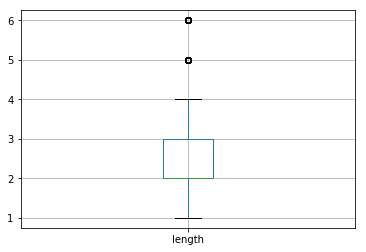

In [0]:
col = 'query'
print(df_train[col].str.len().mean())
df_train['length'] = df_train[col].apply(lambda x: len(x.split()))
print(df_train['length'].mean())
df_train.boxplot(column=['length'])

53.97479818861981
8.963378617838156


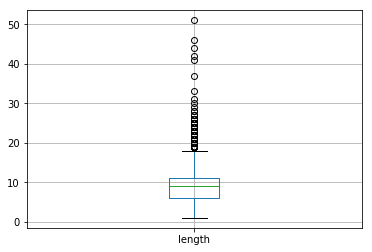

In [0]:
col = 'product_title'
print(df_train[col].str.len().mean())
df_train['length'] = df_train[col].apply(lambda x: len(x.split()))
print(df_train['length'].mean())
df_train.boxplot(column=['length'])

387.28607993699546
63.64619019492026


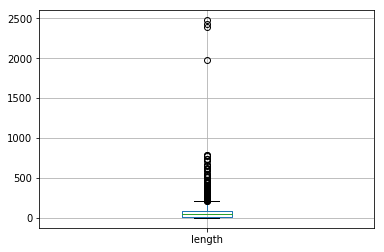

In [0]:
col = 'product_description'
print(df_train[col].str.len().mean())
df_train['length'] = df_train[col].apply(lambda x: len(x.split()))
print(df_train['length'].mean())
df_train.boxplot(column=['length'])

In [0]:
df_train['product_title'] = df_train[['product_title', 'product_description']].apply(lambda x: ' '.join(x), axis=1)
df_test['product_title'] = df_test[['product_title', 'product_description']].apply(lambda x: ' '.join(x), axis=1)
# df_train['query'] = df_train[['query', 'product_title']].apply(lambda x: ' [SEP] '.join(x), axis=1)
# df_test['query'] = df_test[['query', 'product_title']].apply(lambda x: ' [SEP] '.join(x), axis=1)

df_train.head()

,id,query,product_title,product_description,median_relevance,relevance_variance,length
0,1,bridal shower decorations,Accent Pillow with Heart Design Red Black Re...,Red satin accent pillow embroidered with a hea...,1,0.000,14
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000,159
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,,4,0.471,0
3,5,wine rack,Concept Housewares WR 44526 Solid Wood Ceiling...,Like a silent and sturdy tree the Southern En...,4,0.000,125
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,WTGR1011 Features Nickel base 60 000 average ...,2,0.471,46


In [0]:
# df_train['median_relevance'] = df_train['median_relevance']/4

14.949301043512502
2.424788344162237


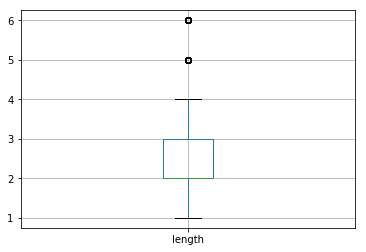

In [0]:
col = 'query'
print(df_train[col].str.len().mean())
df_train['length'] = df_train[col].apply(lambda x: len(x.split()))
print(df_train['length'].mean())
df_train.boxplot(column=['length'])

In [0]:
df = df_train.sample(frac=1)

In [0]:
output_directory = 'data'

x_col_names = ['id', 'query', 'product_title', 'product_description']
y_col_name = 'median_relevance'

from os.path import join as joinpath
import pandas as pd
from sklearn.model_selection import train_test_split


def split_save_df(df, x_col_names, y_col_name, output_directory, test_size=0.1, method='random', output_format='csv', train_name='train.csv', test_name='test.csv', random_state=0):
    '''
    method
    random: Splits randomly in stratifies manner
    first_n: Splits by first n rows. Needed when we want to use first n rows for train and rest for test.
    '''
    df = df[[*x_col_names, y_col_name]]
    if method == 'random':
        df_train, df_test = train_test_split(df, stratify=df[[y_col_name]], test_size=test_size, random_state=random_state)
    elif method == 'first_n':
        train_length = int(len(df) * (1 - test_size))
        df_train, df_test = df[:train_length], df[train_length:]
    if output_format == 'csv':
      df_train.to_csv(joinpath(output_directory, train_name), index=False)
      df_test.to_csv(joinpath(output_directory, test_name), index=False)
    elif output_format == 'tsv':
      df_train.to_csv(joinpath(output_directory, train_name), sep='\t', index=False)
      df_test.to_csv(joinpath(output_directory, test_name), sep='\t', index=False)

split_save_df(df, x_col_names=x_col_names, y_col_name=y_col_name,
              output_directory=output_directory, output_format='tsv',
              test_size=0.1, method='random', 
              train_name='train.tsv', test_name='dev.tsv')

df_test = df_test[x_col_names]
df_test.to_csv(joinpath(output_directory, 'test.tsv'), sep='\t', index=False)
time.sleep(10)

In [0]:
# --do_lower_case --fp16

In [0]:
!python run_glue.py --task_name crowdflower --model_type roberta --model_name_or_path roberta-base --data_dir data --output_dir models --max_seq_length 64 --per_gpu_train_batch_size 8 --per_gpu_eval_batch_size 32 --num_train_epochs 2 --save_steps 5000 --do_train --do_eval --overwrite_output_dir

10/14/2019 10:12:42 - WARNING - __main__ -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: False
10/14/2019 10:12:42 - INFO - transformers.file_utils -   https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-config.json not found in cache or force_download set to True, downloading to /tmp/tmpjlyg_p36
100% 473/473 [00:00<00:00, 46770.38B/s]
10/14/2019 10:12:42 - INFO - transformers.file_utils -   copying /tmp/tmpjlyg_p36 to cache at /root/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.9dad9043216064080cf9dd3711c53c0f11fe2b09313eaa66931057b4bdcaf068
10/14/2019 10:12:42 - INFO - transformers.file_utils -   creating metadata file for /root/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.9dad9043216064080cf9dd3711c53c0f11fe2b09313eaa66931057b4bdcaf068
10/14/2019 10:12:42 - INFO - transformers.file_utils -   removing temp file /tmp/tmpjlyg_p36
10/14/201

In [0]:
# import torch
# from transformers import BertTokenizer, BertModel, BertForMaskedLM

# # OPTIONAL: if you want to have more information on what's happening under the hood, activate the logger as follows
# import logging
# logging.basicConfig(level=logging.INFO)

# # Load pre-trained model tokenizer (vocabulary)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

INFO:transformers.tokenization_utils:loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at /root/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084


In [0]:
# # Tokenize input
# for text in df_test['query'].values:
#   # text = "[CLS] Who was Jim Henson ? [SEP] Jim Henson was a puppeteer [SEP]"
#   tokenized_text = tokenizer.tokenize(text)
#   indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

TypeError: ignored

In [0]:
# # Mask a token that we will try to predict back with `BertForMaskedLM`
# masked_index = 8
# tokenized_text[masked_index] = '[MASK]'
# assert tokenized_text == ['[CLS]', 'who', 'was', 'jim', 'henson', '?', '[SEP]', 'jim', '[MASK]', 'was', 'a', 'puppet', '##eer', '[SEP]']

# # Convert token to vocabulary indices
# indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
# # Define sentence A and B indices associated to 1st and 2nd sentences (see paper)
# segments_ids = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

# # Convert inputs to PyTorch tensors
# tokens_tensor = torch.tensor([indexed_tokens])
# segments_tensors = torch.tensor([segments_ids])

In [0]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('models/pytorch_model.bin')

# Set the model in evaluation mode to deactivate the DropOut modules
# This is IMPORTANT to have reproducible results during evaluation!
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
segments_tensors = segments_tensors.to('cuda')
model.to('cuda')

# Predict hidden states features for each layer
with torch.no_grad():
    # See the models docstrings for the detail of the inputs
    outputs = model(tokens_tensor, token_type_ids=segments_tensors)
    # Transformers models always output tuples.
    # See the models docstrings for the detail of all the outputs
    # In our case, the first element is the hidden state of the last layer of the Bert model
    encoded_layers = outputs[0]
# We have encoded our input sequence in a FloatTensor of shape (batch size, sequence length, model hidden dimension)
assert tuple(encoded_layers.shape) == (1, len(indexed_tokens), model.config.hidden_size)

In [0]:
# Load pre-trained model (weights)
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
segments_tensors = segments_tensors.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor, token_type_ids=segments_tensors)
    predictions = outputs[0]

# confirm we were able to predict 'henson'
predicted_index = torch.argmax(predictions[0, masked_index]).item()
predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]
assert predicted_token == 'henson'